## Set system path

In [5]:
import sys
from pathlib import Path
import importlib

# Add the parent of the *outer* DLC-Jupyter-Notebooks folder to sys.path
project_root = Path().resolve().parents[0]  # This is /Users/atanugiri/Downloads/DLC-Jupyter-Notebooks
sys.path.append(str(project_root))


## Connect to database

In [7]:
import os
import psycopg2
import pandas as pd
import platform

host = "localhost" if platform.system() == "Windows" else "129.108.49.49"
conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password="1234", host=host, port="5432")
cursor = conn.cursor()


## Plot a few trajectories side by side

In [8]:
query = """
SELECT id FROM dlc_table WHERE task='ToyLight' AND genotype = 'white' AND dose_mult=2 AND health='saline'
ORDER BY id
"""

df = pd.read_sql_query(query, conn)
id_list = df['id'].tolist()
print(id_list)

from Python_scripts.Data_analysis.plot_single_trajectory import plot_single_trajectory

import matplotlib.pyplot as plt

# for id in id_list[:5]:
#     fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#     plot_single_trajectory(conn, id, bodypart='Midback',
#                            normalize=False, interpolate=False, likelihood_threshold=0,
#                            label=None, color=None, style='line',
#                            max_points=None, color_by_time=True, ax=axs[0]
#                            )

#     plot_single_trajectory(conn, id, bodypart='Midback',
#                        normalize=True, interpolate=True, likelihood_threshold=0.5,
#                        label=None, color=None, style='line',
#                        max_points=None, color_by_time=False, ax=axs[1]
#                        )
#     plt.tight_layout()
#     plt.show()


/var/folders/_n/c65sg0c951g6vgwcpzsdc2tc0000gn/T/ipykernel_77299/4219724097.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


[497, 500, 503, 508, 509, 510, 513, 515, 518, 521, 523, 524, 528, 529, 531, 535, 536]


### Indiv curvature plot

/Users/atanugiri/Downloads/DeepLabCutProjects/GhrelinBehaviorQuantification/Python_scripts/Data_analysis/normalized_bodypart.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_meta = pd.read_sql_query(q, conn, params=(trial_id,))
/Users/atanugiri/Downloads/DeepLabCutProjects/GhrelinBehaviorQuantification/Python_scripts/Data_analysis/normalized_bodypart.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_meta = pd.read_sql_query(q, conn, params=(trial_id,))
/Users/atanugiri/Downloads/DeepLabCutProjects/GhrelinBehaviorQuantification/Python_scripts/Data_analysis/normalized_bodypart.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or data

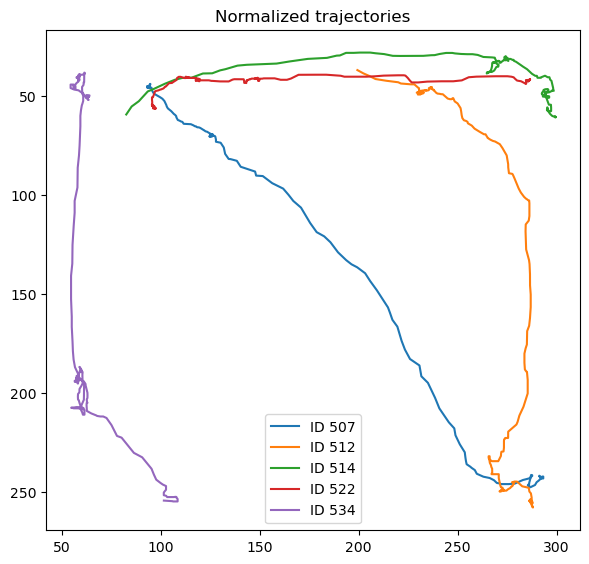

In [9]:
# id_list = [508, 513, 518, 524, 528] # Curved saline
id_list = [507, 512, 514, 522, 534] # Curved ghrelin

fig, ax = plt.subplots(figsize=(6, 6))
id_list 
for id in id_list:
    plot_single_trajectory(
        conn, id,
        bodypart='Midback',
        normalize=False, interpolate=True, likelihood_threshold=0.5,
        label=f"ID {id}",
        color=None, style='line',
        max_points=500, color_by_time=False,
        ax=ax
    )

ax.set_title("Normalized trajectories")
ax.legend()
plt.tight_layout()
plt.show()
# fig.savefig("ghrelin_normalized_trajectories.pdf")


## Compare DLC vs Optogen

In [ ]:
import importlib
import Python_scripts.Data_analysis.plot_single_trajectory
import Python_scripts.Data_analysis.plot_single_trajectory_optogen

importlib.reload(Python_scripts.Data_analysis.plot_single_trajectory)
importlib.reload(Python_scripts.Data_analysis.plot_single_trajectory_optogen)

from Python_scripts.Data_analysis.plot_single_trajectory import plot_single_trajectory
from Python_scripts.Data_analysis.plot_single_trajectory_optogen import plot_single_trajectory_optogen

query = "SELECT id FROM dlc_table WHERE video_name LIKE '%FoodLight_9_10_24_Indigo_Y%'"

df = pd.read_sql_query(query, conn)
id = df['id'][0]
print(id)
print(type(id))
plot_single_trajectory(conn, id, max_points=500)
plot_single_trajectory_optogen(conn, id, max_points=500)


In [9]:
import os
import shutil
from pathlib import Path

# Source and destination directories
src_dir = Path("/Users/atanugiri/Downloads/data/FoodLightWhite/DlcDataPytorch")
dst_dir = Path("/Users/atanugiri/Downloads/data/FoodLightWhite/DlcDataPytorchFiltered")

# Create destination directory if it doesn't exist
dst_dir.mkdir(parents=True, exist_ok=True)

# Process all .csv files
for csv_file in src_dir.glob("*.csv"):
    base = csv_file.stem  # filename without .csv extension
    new_name = f"{base}_filtered.csv"
    dst_path = dst_dir / new_name

    shutil.copy(csv_file, dst_path)
    print(f"Copied and renamed: {csv_file.name} -> {new_name}")


Copied and renamed: FoodLight_1_16_25_S2Y_DenverDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100.csv -> FoodLight_1_16_25_S2Y_DenverDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100_filtered.csv
Copied and renamed: FoodLightInhibitory_1_15_25_S2P_EDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100.csv -> FoodLightInhibitory_1_15_25_S2P_EDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100_filtered.csv
Copied and renamed: FoodLight_1_17_25_S4P_NewYorkDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100.csv -> FoodLight_1_17_25_S4P_NewYorkDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100_filtered.csv
Copied and renamed: FoodLight_1_17_25_S3P_NewOrleansDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100.csv -> FoodLight_1_17_25_S3P_NewOrleansDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100_filtered.csv
Copied and renamed: FoodLightExcitatory_2_20_25_S2Y_HappyDLC_Resnet50_DLC-WhiteAnimalsJul23shuffle3_snapshot_100.csv -> FoodLightExcitatory_2_20_25_